In [ ]:
from torchtext import data
import torchtext
import spacy
import torch.nn as nn
import time
import torch.nn.functional as F
import sys


path = '/content/drive/My Drive/'



In [ ]:
TEXT = data.Field(tokenize = 'spacy', lower = True)
LABEL = data.LabelField()

fields =[('question1',TEXT),('question2',TEXT),('is_duplicate',LABEL)]
train_data,valid_data = data.TabularDataset.splits(
        path=path, train='train_data_mod.csv', validation = 'validate_data_mod.csv',
        format='csv',
        skip_header = True,
        fields=fields)

In [ ]:
import torch

MIN_FREQ = 2
TEXT.build_vocab(train_data, 
                 min_freq = MIN_FREQ,
                 vectors = "glove.6B.300d",
                 unk_init = torch.Tensor.normal_)

LABEL.build_vocab(train_data)

.vector_cache/glove.6B.zip: 862MB [06:27, 2.23MB/s]                           
100%|█████████▉| 399129/400000 [00:40<00:00, 10161.35it/s]

In [ ]:
print(f"Unique tokens in TEXT vocabulary: {len(TEXT.vocab)}")

Unique tokens in TEXT vocabulary: 54531


In [ ]:
print(TEXT.vocab.freqs.most_common(20))

[('?', 830871), ('the', 368146), ('what', 316488), ('is', 264383), ('i', 217268), ('how', 215290), ('a', 206069), ('to', 200540), ('in', 191971), ('do', 165563), ('of', 155911), ('are', 143078), ('and', 129948), ('can', 111803), ('for', 101851), (',', 95847), ('you', 90885), ('why', 82028), ('it', 69280), ('my', 69196)]


In [ ]:
print(TEXT.vocab.itos[:10])

['<unk>', '<pad>', '?', 'the', 'what', 'is', 'i', 'how', 'a', 'to']


In [ ]:
print(LABEL.vocab.itos)

['0', '1']


In [ ]:
print(LABEL.vocab.freqs.most_common())

[('0', 248442), ('1', 145848)]


In [ ]:
BATCH_SIZE = 512

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device')

train_iterator = data.BucketIterator(
    train_data, 
    batch_size = BATCH_SIZE,
    device = device)

valid_iterator = data.BucketIterator(
    valid_data, 
    batch_size = BATCH_SIZE,
    device = device)



device


In [ ]:
# #maxpool
# class NLIBiLSTM(nn.Module):
#     def __init__(self, 
#                  input_dim, 
#                  embedding_dim,
#                  hidden_dim,
#                  n_lstm_layers,
#                  n_fc_layers,
#                  output_dim, 
#                  dropout, 
#                  pad_idx):
        
#         super().__init__()
                                
#         self.embedding = nn.Embedding(input_dim, embedding_dim, padding_idx = pad_idx)
        
#         self.translation = nn.Linear(embedding_dim, hidden_dim)
        
#         self.lstm = nn.LSTM(hidden_dim, 
#                             hidden_dim, 
#                             num_layers = n_lstm_layers, 
#                             bidirectional = True, 
#                             dropout=dropout if n_lstm_layers > 1 else 0)
        
#         fc_dim = hidden_dim * 2
        
#         fcs = [nn.Linear(fc_dim * 4, fc_dim * 4) for _ in range(n_fc_layers)]
        
#         self.fcs = nn.ModuleList(fcs)
        
#         self.fc_out = nn.Linear(fc_dim * 4, output_dim)
        
#         self.dropout = nn.Dropout(dropout)
           
#     def forward(self, prem, hypo):

#         prem_seq_len, batch_size = prem.shape
#         hypo_seq_len, _ = hypo.shape
        
       
        
#         embedded_prem = self.embedding(prem)
#         embedded_hypo = self.embedding(hypo)
        
        
#         translated_prem = F.relu(self.translation(embedded_prem))
#         translated_hypo = F.relu(self.translation(embedded_hypo))
        
        
        
#         outputs_prem, (hidden_prem, cell_prem) = self.lstm(translated_prem)
#         outputs_hypo, (hidden_hypo, cell_hypo) = self.lstm(translated_hypo)

       
#         outputs_prem = torch.max(outputs_prem,0)[0]
#         outputs_hypo = torch.max(outputs_hypo,0)[0] 

#         hidden = torch.cat((outputs_prem, outputs_hypo,torch.abs(outputs_prem-outputs_hypo),outputs_prem*outputs_hypo), dim=1)


#         #hidden = [batch size, fc dim * 2]
#         for fc in self.fcs:
#             hidden = fc(hidden)
#             hidden = F.relu(hidden)
#             hidden = self.dropout(hidden)
        
#         prediction = self.fc_out(hidden)
        
#         #prediction = [batch size, output dim]
        
#         return prediction

In [ ]:
# # will do mean pool
# class NLIBiLSTM(nn.Module):
#     def __init__(self, 
#                  input_dim, 
#                  embedding_dim,
#                  hidden_dim,
#                  n_lstm_layers,
#                  n_fc_layers,
#                  output_dim, 
#                  dropout, 
#                  pad_idx):
        
#         super().__init__()
                                
#         self.embedding = nn.Embedding(input_dim, embedding_dim, padding_idx = pad_idx)
        
#         self.translation = nn.Linear(embedding_dim, hidden_dim)
        
#         self.lstm = nn.LSTM(hidden_dim, 
#                             hidden_dim, 
#                             num_layers = n_lstm_layers, 
#                             bidirectional = True, 
#                             dropout=dropout if n_lstm_layers > 1 else 0)
        
#         fc_dim = hidden_dim * 2
        
#         fcs = [nn.Linear(fc_dim * 4, fc_dim * 4) for _ in range(n_fc_layers)]
        
#         self.fcs = nn.ModuleList(fcs)
        
#         self.fc_out = nn.Linear(fc_dim * 4, output_dim)
        
#         self.dropout = nn.Dropout(dropout)
           
#     def forward(self, prem, hypo):

#         prem_seq_len, batch_size = prem.shape
#         hypo_seq_len, _ = hypo.shape
        
#         embedded_prem = self.embedding(prem)
#         embedded_hypo = self.embedding(hypo)
        
#         translated_prem = F.relu(self.translation(embedded_prem))
#         translated_hypo = F.relu(self.translation(embedded_hypo))
        
#         outputs_prem, (hidden_prem, cell_prem) = self.lstm(translated_prem)
#         outputs_hypo, (hidden_hypo, cell_hypo) = self.lstm(translated_hypo)

#         outputs_prem = torch.mean(outputs_prem,0)
#         outputs_hypo = torch.mean(outputs_hypo,0) 

#         hidden = torch.cat((outputs_prem, outputs_hypo,torch.abs(outputs_prem-outputs_hypo),outputs_prem*outputs_hypo), dim=1)


#         #hidden = [batch size, fc dim * 2]
#         for fc in self.fcs:
#             hidden = fc(hidden)
#             hidden = F.relu(hidden)
#             hidden = self.dropout(hidden)
        
#         prediction = self.fc_out(hidden)
        
#         #prediction = [batch size, output dim]
        
#         return prediction

In [ ]:
# # will do no pooling
# class NLIBiLSTM(nn.Module):
#     def __init__(self, 
#                  input_dim, 
#                  embedding_dim,
#                  hidden_dim,
#                  n_lstm_layers,
#                  n_fc_layers,
#                  output_dim, 
#                  dropout, 
#                  pad_idx):
        
#         super().__init__()
                                
#         self.embedding = nn.Embedding(input_dim, embedding_dim, padding_idx = pad_idx)
        
#         self.translation = nn.Linear(embedding_dim, hidden_dim)
        
#         self.lstm = nn.LSTM(hidden_dim, 
#                             hidden_dim, 
#                             num_layers = n_lstm_layers, 
#                             bidirectional = True, 
#                             dropout=dropout if n_lstm_layers > 1 else 0)
        
#         fc_dim = hidden_dim * 2
        
#         fcs = [nn.Linear(fc_dim * 4, fc_dim * 4) for _ in range(n_fc_layers)]
        
#         self.fcs = nn.ModuleList(fcs)
        
#         self.fc_out = nn.Linear(fc_dim * 4, output_dim)
        
#         self.dropout = nn.Dropout(dropout)
           
#     def forward(self, prem, hypo):

#         prem_seq_len, batch_size = prem.shape
#         hypo_seq_len, _ = hypo.shape
        
#         embedded_prem = self.embedding(prem)
#         embedded_hypo = self.embedding(hypo)
        
#         translated_prem = F.relu(self.translation(embedded_prem))
#         translated_hypo = F.relu(self.translation(embedded_hypo))
        
#         outputs_prem, (hidden_prem, cell_prem) = self.lstm(translated_prem)
#         outputs_hypo, (hidden_hypo, cell_hypo) = self.lstm(translated_hypo)
        
#         hidden_prem = torch.cat((hidden_prem[-1], hidden_prem[-2]), dim=-1)
#         hidden_hypo = torch.cat((hidden_hypo[-1], hidden_hypo[-2]), dim=-1)
       
       
#         hidden = torch.cat((hidden_prem, hidden_hypo,torch.abs(hidden_prem-hidden_hypo),hidden_prem*hidden_hypo), dim=1)

#         for fc in self.fcs:
#             hidden = fc(hidden)
#             hidden = F.relu(hidden)
#             hidden = self.dropout(hidden)
        
#         prediction = self.fc_out(hidden)
        
#         return prediction

In [ ]:
# #attention model
# class NLIBiLSTM(nn.Module):
#     def __init__(self, 
#                  input_dim, 
#                  embedding_dim,
#                  hidden_dim,
#                  n_lstm_layers,
#                  n_fc_layers,
#                  output_dim, 
#                  dropout, 
#                  pad_idx):
        
#         super().__init__()
                                
#         self.embedding = nn.Embedding(input_dim, embedding_dim, padding_idx = pad_idx)
        
#         self.translation = nn.Linear(embedding_dim, hidden_dim)
        
#         self.lstm = nn.LSTM(hidden_dim, 
#                             hidden_dim, 
#                             num_layers = n_lstm_layers, 
#                             bidirectional = True, 
#                             dropout=dropout if n_lstm_layers > 1 else 0)
        
#         fc_dim = hidden_dim * 2

#         self.ws1 = torch.nn.Parameter(torch.zeros(2*hidden_dim,2*hidden_dim),requires_grad=True)
#         self.ws2 = torch.nn.Parameter(torch.zeros(2*hidden_dim,1),requires_grad=True)

#         self.tanh = nn.Tanh()
#         self.softmax = nn.Softmax(dim = 1)

#         torch.nn.init.xavier_uniform_(self.ws1.data)
#         torch.nn.init.xavier_uniform_(self.ws2.data)


        
#         fcs = [nn.Linear(fc_dim * 4, fc_dim * 4) for _ in range(n_fc_layers)]
        
#         self.fcs = nn.ModuleList(fcs)
        
#         self.fc_out = nn.Linear(fc_dim * 4, output_dim)
        
#         self.dropout = nn.Dropout(dropout)
           
#     def forward(self, prem, hypo):

#         prem_seq_len, batch_size = prem.shape
#         hypo_seq_len, _ = hypo.shape
          
#         embedded_prem = self.embedding(prem)
#         embedded_hypo = self.embedding(hypo)
        
        
#         translated_prem = F.relu(self.translation(embedded_prem))
#         translated_hypo = F.relu(self.translation(embedded_hypo))
        
#         outputs_prem, (hidden_prem, cell_prem) = self.lstm(translated_prem)
#         outputs_hypo, (hidden_hypo, cell_hypo) = self.lstm(translated_hypo)
#         outputs_prem = outputs_prem.permute(1,0,2)
#         outputs_hypo = outputs_hypo.permute(1,0,2)


#         batch_size = outputs_prem.shape[0]

#         x = torch.bmm(outputs_prem,self.ws1.repeat(batch_size,1,1))
#         x = self.tanh(x)
#         x = torch.bmm(x,self.ws2.repeat(batch_size,1,1))
#         x = self.softmax(x)
#         x  = outputs_prem * x
#         x_prem = torch.sum(x,dim =1).squeeze()

#         x = torch.bmm(outputs_hypo,self.ws1.repeat(batch_size,1,1))
#         x = self.tanh(x)
#         x = torch.bmm(x,self.ws2.repeat(batch_size,1,1))
#         x = self.softmax(x)
#         x  = outputs_hypo * x
#         x_hypo = torch.sum(x,dim=1).squeeze()
       

#         hidden = torch.cat((x_prem, x_hypo,torch.abs(x_prem-x_hypo),x_prem*x_hypo), dim=1)


        
#         for fc in self.fcs:
#             hidden = fc(hidden)
#             hidden = F.relu(hidden)
#             hidden = self.dropout(hidden)
        
#         prediction = self.fc_out(hidden)  
#         return prediction

In [ ]:
# 1D CNN
class NLIBiLSTM(nn.Module):
    def __init__(self, 
                 input_dim, 
                 embedding_dim,
                 hidden_dim,
                 n_lstm_layers,
                 n_fc_layers,
                 output_dim, 
                 dropout, 
                 pad_idx):
        
        super().__init__()
                                
        self.embedding = nn.Embedding(input_dim, embedding_dim, padding_idx = pad_idx)
        
        self.translation = nn.Linear(embedding_dim, hidden_dim)
        window_size = 3;

        self.conv1 = nn.Conv2d(1,1,(window_size,1))
        self.conv2 = nn.Conv2d(1,1,(window_size,1))
        self.conv3 = nn.Conv2d(1,1,(window_size,1))
        self.conv4 = nn.Conv2d(1,1,(window_size,1))

        fc_dim = hidden_dim

                
        fcs = [nn.Linear(fc_dim * 4, fc_dim * 4) for _ in range(n_fc_layers)]
        
        self.fcs = nn.ModuleList(fcs)
        
        self.fc_out = nn.Linear(fc_dim * 4, output_dim)
        
        self.dropout = nn.Dropout(dropout)
           
    def forward(self, prem, hypo):

        prem_seq_len, batch_size = prem.shape
        hypo_seq_len, _ = hypo.shape
          
        embedded_prem = self.embedding(prem)
        embedded_hypo = self.embedding(hypo)
        
        
        translated_prem = F.relu(self.translation(embedded_prem))
        translated_hypo = F.relu(self.translation(embedded_hypo))

        translated_prem = translated_prem.reshape(1,translated_prem.shape[0],translated_prem.shape[1],-1).permute(2,0,1,3)
        translated_hypo = translated_hypo.reshape(1,translated_hypo.shape[0],translated_hypo.shape[1],-1).permute(2,0,1,3)

        # print(translated_prem.shape)
        # print(translated_hypo.shape)


        x = (self.conv1(translated_prem))
        x = (self.conv2(x))
        x = (self.conv3(x))
        x = (self.conv4(x))
        x = x.squeeze()
        x = torch.max(x,1)[0]

        y = (self.conv1(translated_hypo))
        y = (self.conv2(y))
        y = (self.conv3(y))
        y = (self.conv4(y))
        y = y.squeeze()
        y = torch.max(y,1)[0]

        # print(x.shape)
        # print(y.shape)
        # sys.exit()


        hidden = torch.cat((x,y,torch.abs(x-y),x*y), dim=1)


        
        for fc in self.fcs:
            hidden = fc(hidden)
            hidden = F.relu(hidden)
            hidden = self.dropout(hidden)
        
        prediction = self.fc_out(hidden)  
        return prediction

In [ ]:
# # 1D CNN
# class NLIBiLSTM(nn.Module):
#     def __init__(self, 
#                  input_dim, 
#                  embedding_dim,
#                  hidden_dim,
#                  n_lstm_layers,
#                  n_fc_layers,
#                  output_dim, 
#                  dropout, 
#                  pad_idx):
        
#         super().__init__()
                                
#         self.embedding = nn.Embedding(input_dim, embedding_dim, padding_idx = pad_idx)
        
#         self.translation = nn.Linear(embedding_dim, hidden_dim)
#         window_size = 3;

#         self.conv1 = nn.Conv2d(1,300,(window_size,300))
#         self.conv2 = nn.Conv2d(1,300,(window_size,300))
#         self.conv3 = nn.Conv2d(1,300,(window_size,300))
#         self.conv4 = nn.Conv2d(1,300,(window_size,300))

#         fc_dim = hidden_dim

                
#         fcs = [nn.Linear(fc_dim * 4, fc_dim * 4) for _ in range(n_fc_layers)]
        
#         self.fcs = nn.ModuleList(fcs)
        
#         self.fc_out = nn.Linear(fc_dim * 4, output_dim)
        
#         self.dropout = nn.Dropout(dropout)
           
#     def forward(self, prem, hypo):

#         prem_seq_len, batch_size = prem.shape
#         hypo_seq_len, _ = hypo.shape
          
#         embedded_prem = self.embedding(prem)
#         embedded_hypo = self.embedding(hypo)
        
        
#         translated_prem = F.relu(self.translation(embedded_prem))
#         translated_hypo = F.relu(self.translation(embedded_hypo))

#         translated_prem = translated_prem.reshape(1,translated_prem.shape[0],translated_prem.shape[1],-1).permute(2,0,1,3)
#         translated_hypo = translated_hypo.reshape(1,translated_hypo.shape[0],translated_hypo.shape[1],-1).permute(2,0,1,3)

#         # print(translated_prem.shape)
#         # print(translated_hypo.shape)


#         x = F.relu(self.conv1(translated_prem).permute(0,3,2,1))
#         x = F.relu(self.conv2(x).permute(0,3,2,1))
#         x = F.relu(self.conv3(x).permute(0,3,2,1))
#         x = F.relu(self.conv4(x).permute(0,3,2,1))
#         x = x.squeeze()
#         x = torch.max(x,1)[0]

#         y = F.relu(self.conv1(translated_hypo).permute(0,3,2,1))
#         y = F.relu(self.conv2(y).permute(0,3,2,1))
#         y = F.relu(self.conv3(y).permute(0,3,2,1))

#         y = F.relu(self.conv4(y).permute(0,3,2,1))
#         y = y.squeeze()
#         y = torch.max(y,1)[0]

#         # print(x.shape)
#         # print(y.shape)
#         # sys.exit()


#         hidden = torch.cat((x,y,torch.abs(x-y),x*y), dim=1)


        
#         for fc in self.fcs:
#             hidden = fc(hidden)
#             hidden = F.relu(hidden)
#             hidden = self.dropout(hidden)
        
#         prediction = self.fc_out(hidden)  
#         return prediction

In [ ]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 300
HIDDEN_DIM = 300
N_LSTM_LAYERS = 1
N_FC_LAYERS = 3
OUTPUT_DIM = len(LABEL.vocab)
DROPOUT = 0.25
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = NLIBiLSTM(INPUT_DIM,
                  EMBEDDING_DIM,
                  HIDDEN_DIM,
                  N_LSTM_LAYERS,
                  N_FC_LAYERS,
                  OUTPUT_DIM,
                  DROPOUT,
                  PAD_IDX).to(device)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 20,775,618 trainable parameters


In [ ]:
pretrained_embeddings = TEXT.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([54531, 300])


In [ ]:
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[ 0.8543,  0.8804,  1.4771,  ..., -3.3385,  3.2162,  0.8564],
        [ 1.1484, -0.9949,  0.2790,  ...,  0.1340,  0.3709, -1.4518],
        [-0.0833, -0.2090, -0.0436,  ..., -0.1775,  0.0558,  0.8013],
        ...,
        [ 0.9971, -1.9249,  0.2666,  ...,  0.1870,  0.8133, -0.5361],
        [-1.2981, -0.2590, -0.1845,  ...,  0.6690, -1.3790, -0.0625],
        [ 0.6180,  0.5993, -0.6279,  ..., -1.3815, -0.8079,  0.0175]],
       device='cuda:0')

In [ ]:
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

print(model.embedding.weight.data)

tensor([[ 0.8543,  0.8804,  1.4771,  ..., -3.3385,  3.2162,  0.8564],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0833, -0.2090, -0.0436,  ..., -0.1775,  0.0558,  0.8013],
        ...,
        [ 0.9971, -1.9249,  0.2666,  ...,  0.1870,  0.8133, -0.5361],
        [-1.2981, -0.2590, -0.1845,  ...,  0.6690, -1.3790, -0.0625],
        [ 0.6180,  0.5993, -0.6279,  ..., -1.3815, -0.8079,  0.0175]],
       device='cuda:0')


In [ ]:
model.embedding.weight.requires_grad = False

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 4,416,318 trainable parameters


In [ ]:
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
criterion = nn.CrossEntropyLoss().to(device)

In [ ]:
def categorical_accuracy(preds, y):
    max_preds = preds.argmax(dim = 1, keepdim = True) 
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / torch.FloatTensor([y.shape[0]])

In [ ]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        prem = batch.question1
        hypo = batch.question2
        labels = batch.is_duplicate
        
        optimizer.zero_grad()
       
        predictions = model(prem, hypo)
        
        loss = criterion(predictions, labels)
                
        acc = categorical_accuracy(predictions, labels)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0

    
    model.eval()

    
    with torch.no_grad():
      for batch in iterator:
        prem = batch.question1
        hypo = batch.question2
        labels = batch.is_duplicate
        predictions = model(prem, hypo)
            
        loss = criterion(predictions, labels)
                
        acc = categorical_accuracy(predictions, labels)
            
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

loss_1 = []
loss_2 = []
acc_1 = []
acc_2 = []


In [ ]:
N_EPOCHS = 10

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'deep_model.pt')
    loss_1.append(train_loss)
    loss_2.append(valid_loss)
    acc_1.append(train_acc)
    acc_2.append(valid_acc)
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 2m 8s
	Train Loss: 0.458 | Train Acc: 77.13%
	 Val. Loss: 0.390 |  Val. Acc: 81.71%
Epoch: 02 | Epoch Time: 2m 8s
	Train Loss: 0.365 | Train Acc: 83.01%
	 Val. Loss: 0.358 |  Val. Acc: 83.64%
Epoch: 03 | Epoch Time: 2m 8s
	Train Loss: 0.331 | Train Acc: 84.83%
	 Val. Loss: 0.338 |  Val. Acc: 84.64%
Epoch: 04 | Epoch Time: 2m 9s
	Train Loss: 0.306 | Train Acc: 86.15%
	 Val. Loss: 0.341 |  Val. Acc: 84.74%
Epoch: 05 | Epoch Time: 2m 8s
	Train Loss: 0.287 | Train Acc: 87.19%
	 Val. Loss: 0.329 |  Val. Acc: 84.75%
Epoch: 06 | Epoch Time: 2m 8s
	Train Loss: 0.271 | Train Acc: 87.97%
	 Val. Loss: 0.325 |  Val. Acc: 85.31%
Epoch: 07 | Epoch Time: 2m 8s
	Train Loss: 0.255 | Train Acc: 88.76%
	 Val. Loss: 0.338 |  Val. Acc: 85.44%
Epoch: 08 | Epoch Time: 2m 9s
	Train Loss: 0.242 | Train Acc: 89.41%
	 Val. Loss: 0.332 |  Val. Acc: 85.77%
Epoch: 09 | Epoch Time: 2m 8s
	Train Loss: 0.229 | Train Acc: 90.10%
	 Val. Loss: 0.364 |  Val. Acc: 85.52%
Epoch: 10 | Epoch Time: 2m 8

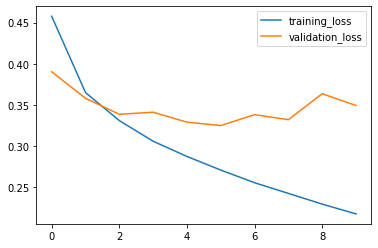

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_1,label = 'training_loss')
plt.plot(loss_2,label = 'validation_loss')
plt.legend()


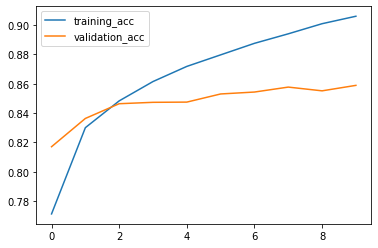

In [ ]:
plt.plot(acc_1,label = 'training_acc')
plt.plot(acc_2,label = 'validation_acc')
plt.legend()
